Hola **Isaac**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
--
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Isaac, para mantener buenas prácticas y un órden correcto de tu notebook te recomiendo que no tengas muchos procesos en una misma celda, por ejemplo, en la primera celda se pudo separar la parte de la importación de librerías, carga de datos y transformación de los mismos en celdas diferentes ya que esto permite que cuando encuentres un error sea más fácil saber de donde proviene
</div>

Proyecto: Análisis de Rentabilidad de Marketing para Showz


1: Acceso y preparación de los datos

In [1]:
# Importar las librerías necesarias para el análisis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#el estilo de los gráficos 
sns.set_style('whitegrid')

# Cargar los datasets.
try:
    visits = pd.read_csv('/datasets/visits_log_us.csv')
    orders = pd.read_csv('/datasets/orders_log_us.csv')
    costs = pd.read_csv('/datasets/costs_us.csv')
except FileNotFoundError:
    print("Asegúrate de que los archivos estén en las rutas correctas.")

# Renombrar columnas para una mayor legibilidad y consistencia
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
orders.columns = ['buy_ts', 'revenue', 'uid']
costs.columns = ['source_id', 'dt', 'costs']

# Convertir las columnas de tiempo a formato datetime
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

# Crear nuevas columnas de tiempo para el análisis
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.to_period('M')
visits['session_week'] = visits['start_ts'].dt.to_period('W')
visits['session_date'] = visits['start_ts'].dt.date

orders['buy_month'] = orders['buy_ts'].dt.to_period('M')
costs['dt_month'] = costs['dt'].dt.to_period('M')

# Imprimir información básica para verificar la preparación
print("Visits DataFrame:")
visits.info()
print("\nOrders DataFrame:")
orders.info()
print("\nCosts DataFrame:")
costs.info()

Visits DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   device         359400 non-null  object        
 1   end_ts         359400 non-null  datetime64[ns]
 2   source_id      359400 non-null  int64         
 3   start_ts       359400 non-null  datetime64[ns]
 4   uid            359400 non-null  uint64        
 5   session_year   359400 non-null  int64         
 6   session_month  359400 non-null  period[M]     
 7   session_week   359400 non-null  period[W-SUN] 
 8   session_date   359400 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(2), period[M](1), period[W-SUN](1), uint64(1)
memory usage: 24.7+ MB

Orders DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------  

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, la preparación de los datos previo al análisis siempre debe ser el paso inicial para poder operar sobre los mismos de manera adecuada
</div>

2: Elaboración de informes y cálculo de métricas

Aquí calcularemos las métricas clave para entender el comportamiento de los usuarios, las ventas y la rentabilidad del marketing.

DAU: 907.99
WAU: 5716.25
MAU: 23228.42
Sticky Factor (WAU/MAU): 24.61%
Duración promedio de la sesión (ASL): 643.03 segundos


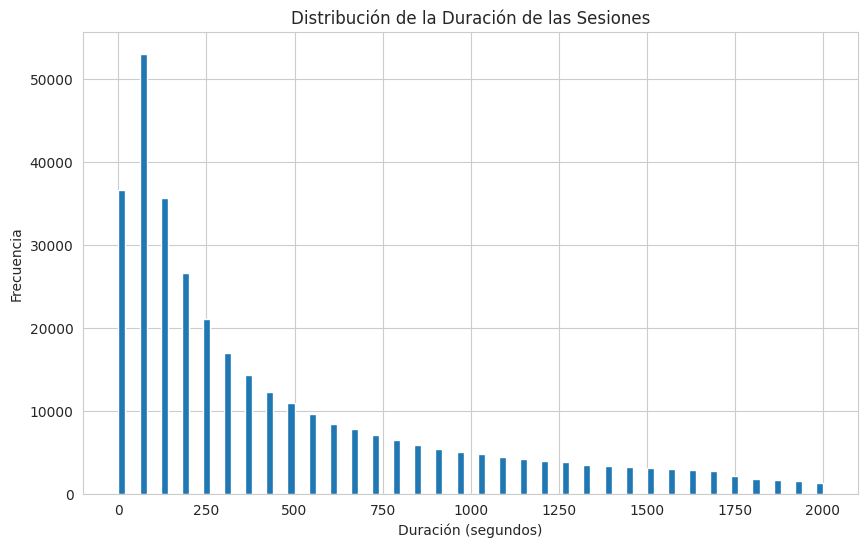

In [2]:

# Calcular DAU, WAU y MAU
dau = visits.groupby('session_date')['uid'].nunique().mean()
wau = visits.groupby('session_week')['uid'].nunique().mean()
mau = visits.groupby('session_month')['uid'].nunique().mean()

print(f"DAU: {dau:.2f}")
print(f"WAU: {wau:.2f}")
print(f"MAU: {mau:.2f}")

# Calcular el factor de retención (Sticky Factor) WAU/MAU
sticky_factor = (wau / mau) * 100
print(f"Sticky Factor (WAU/MAU): {sticky_factor:.2f}%")

# Calcular la duración de la sesión en segundos
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()

# Calcular la duración promedio de la sesión (ASL)
asl = visits['session_duration_sec'].mean()
print(f"Duración promedio de la sesión (ASL): {asl:.2f} segundos")

# Trazar un histograma de la duración de la sesión
plt.figure(figsize=(10, 6))
visits['session_duration_sec'].hist(bins=100, range=(0, 2000))
plt.title('Distribución de la Duración de las Sesiones')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.show()


Cálculo y Visualización del DAU

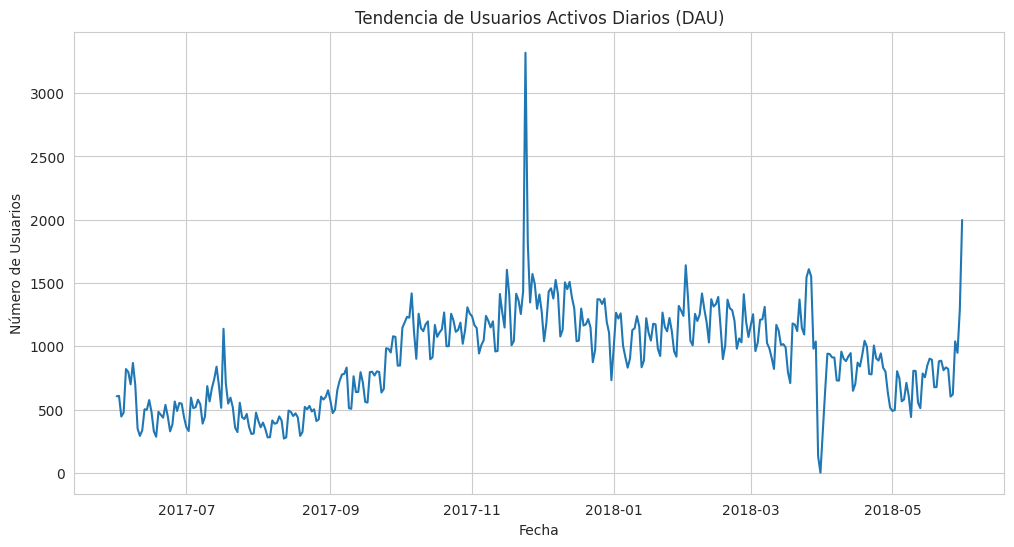

In [3]:
# Agrupamos los usuarios por fecha para calcular el DAU
dau_data = visits.groupby('session_date')['uid'].nunique()

# Visualizamos la tendencia diaria de usuarios
plt.figure(figsize=(12, 6))
dau_data.plot(grid=True)
plt.title('Tendencia de Usuarios Activos Diarios (DAU)')
plt.xlabel('Fecha')
plt.ylabel('Número de Usuarios')
plt.show()

Análisis del DAU
Este gráfico de líneas te permite identificar si hay picos de actividad o caídas repentinas en días específicos.  Una tendencia ascendente a lo largo del tiempo es ideal, mientras que las caídas bruscas podrían estar relacionadas con problemas técnicos o la finalización de una campaña de marketing.Como se observa en el grafico es estable pero ubo un amuento de usuarios entre 2017-11 y 2018-01 tambien ubo una baja en en 2018-03 pero esta en alza el pico al finalizar el grafico de 2018-05. 

Cálculo y Visualización del WAU

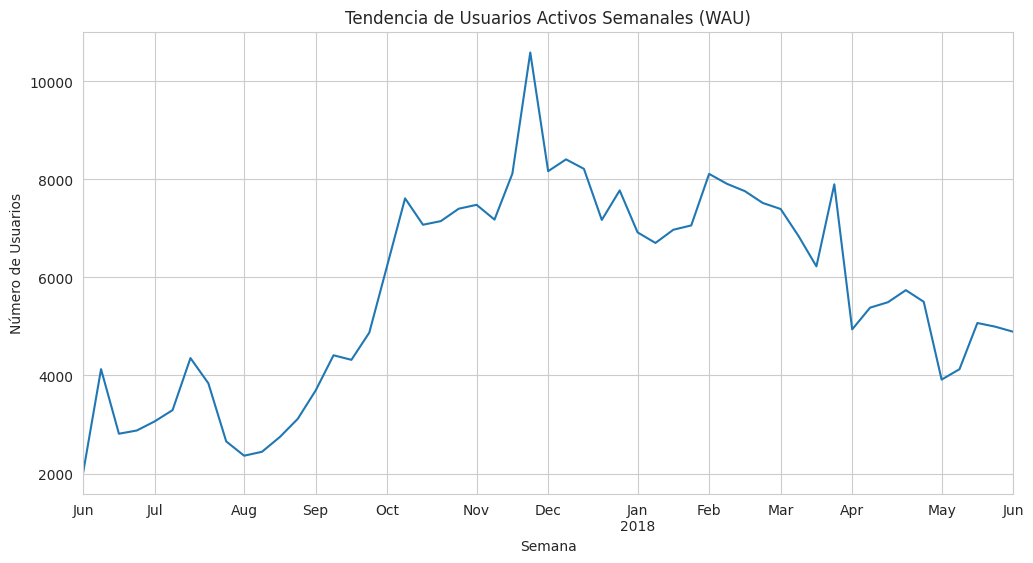

In [4]:
# Agrupamos los usuarios por semana para calcular el WAU
wau_data = visits.groupby('session_week')['uid'].nunique()

# Visualizamos la tendencia semanal de usuarios
plt.figure(figsize=(12, 6))
wau_data.plot(grid=True)
plt.title('Tendencia de Usuarios Activos Semanales (WAU)')
plt.xlabel('Semana')
plt.ylabel('Número de Usuarios')
plt.show()

Análisis del WAU

La gráfica del WAU observa tendencias de baja en el pico por lo cual da un panaroma de bja en usuarios.  Es una métrica robusta para evaluar el rendimiento.



Cálculo y Visualización del MAU

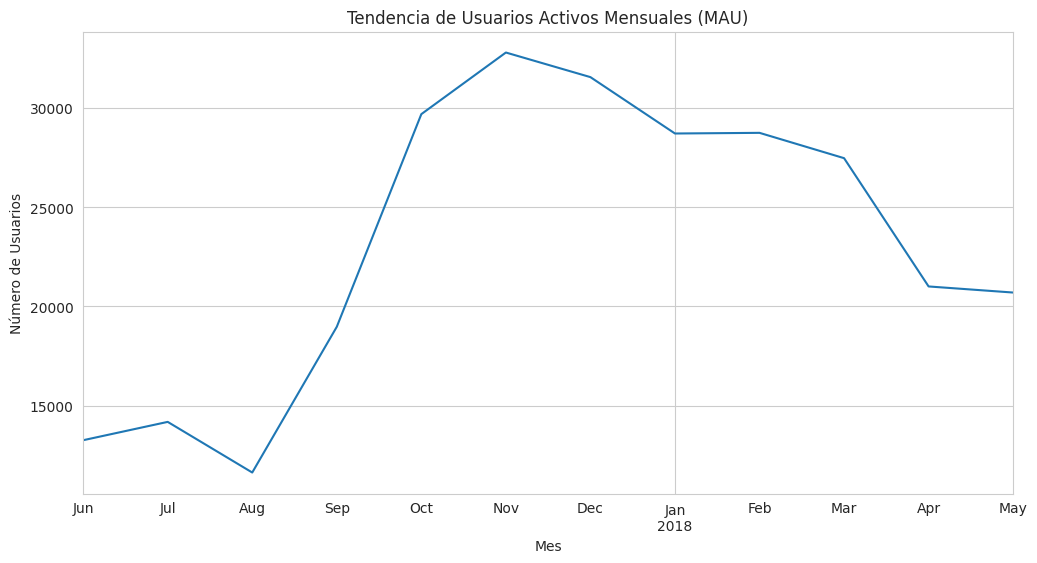

In [5]:
# Agrupamos los usuarios por mes para calcular el MAU
mau_data = visits.groupby('session_month')['uid'].nunique()

# Visualizamos la tendencia mensual de usuarios
plt.figure(figsize=(12, 6))
mau_data.plot(grid=True)
plt.title('Tendencia de Usuarios Activos Mensuales (MAU)')
plt.xlabel('Mes')
plt.ylabel('Número de Usuarios')
plt.show()

Análisis del MAU
El MAU que observamos en la grafica indica que tuvimos un pico de usuarios entre octubre y nobiembre pero a caido en la ultima poartu de al grafico aunque hay usuarios activos es notable que hay abandono por parte de los usuarios en el mes de mayo. 

Factor de Retención (Sticky Factor)

In [6]:
# Calculamos el factor de retención
sticky_factor = (wau_data.mean() / mau_data.mean()) * 100
print(f"Factor de retención (Sticky Factor) WAU/MAU: {sticky_factor:.2f}%")

Factor de retención (Sticky Factor) WAU/MAU: 24.61%


Un Factor de Retención del 24.61% es un indicador positivo para Showz. Esta métrica te dice que, en promedio, casi un cuarto de tus usuarios activos mensuales también visitan tu servicio cada semana.

Este resultado sugiere que los usuarios encuentran un valor significativo en la plataforma, lo que los motiva a regresar con frecuencia. Es un buen indicador de la salud del negocio a largo plazo, ya que muestra una fuerte fidelidad del cliente y un uso recurrente, lo cual es fundamental para el crecimiento orgánico y la retención.

 Análisis y Observaciones.
 Usuarios Activos (DAU, WAU, MAU): Los promedios de usuarios activos diarios, semanales y mensuales te dan una idea del tamaño y la actividad de tu base de usuarios. Si estos números son altos y consistentes, significa que tu servicio tiene una audiencia activa.

Factor de Retención (Sticky Factor): Esta métrica es vital. Un valor alto (por ejemplo, superior al 20%) indica que una proporción significativa de tus usuarios mensuales son también usuarios semanales. Esto sugiere una fidelidad considerable y que el servicio de Showz se ha convertido en una parte regular de la rutina de los clientes.

Duración de la Sesión: La duración promedio de la sesión (ASL) te da una cifra general, pero el histograma es mucho más revelador. Observa que la mayoría de las sesiones son cortas, lo cual es típico en sitios web transaccionales. Sin embargo, la "cola larga" a la derecha del gráfico  muestra un pequeño grupo de usuarios que pasan un tiempo excepcionalmente largo en el sitio. Esto podría ser un indicio de usuarios muy comprometidos, o, por el contrario, que están teniendo problemas para encontrar lo que buscan. Un análisis más detallado de estos casos sería útil.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Los cálculos se realizaron de manera adecuada, para la parte de DAU, MAU, y WAU podrías también complementarlo con una gráfica de líneas a través de las fechas. Pero, te recomiendo también separar cada gráfica y proceso en celdas separadas con su respectiva interpretación por separado.
</div>

Métricas de ventas y  Análisis de Cohortes y LTV

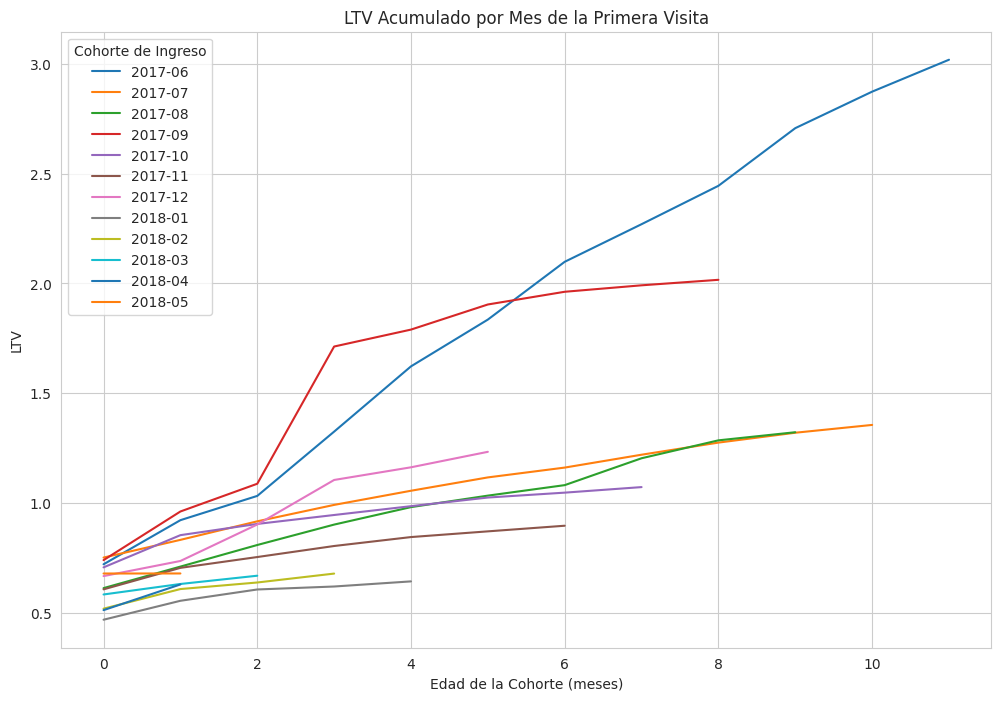

In [9]:
# Encontrar la fecha de la primera visita para cada usuario para definir la cohorte

first_visit = visits.groupby('uid')['start_ts'].min().to_frame('first_visit_ts').reset_index()
first_visit['first_visit_month'] = first_visit['first_visit_ts'].dt.to_period('M')

# Unir con los datos de pedidos para analizar el comportamiento de compra
orders_with_cohort = orders.merge(first_visit, on='uid')

# Calcular la edad de la cohorte en meses
orders_with_cohort['cohort_age'] = (orders_with_cohort['buy_ts'].dt.to_period('M') - orders_with_cohort['first_visit_month']).apply(lambda x: x.n)

# Calcular el LTV (ingresos acumulados por cohorte)
ltv_data = orders_with_cohort.groupby(['first_visit_month', 'cohort_age']).agg(
    revenue=('revenue', 'sum'),
    n_buyers=('uid', 'nunique')
).reset_index()

# Calcular el tamaño de cada cohorte
cohort_sizes = first_visit.groupby('first_visit_month')['uid'].nunique().to_frame('cohort_size')

# Unir datos y calcular LTV
ltv_data = ltv_data.merge(cohort_sizes, on='first_visit_month')
ltv_data['ltv'] = ltv_data['revenue'] / ltv_data['cohort_size']

# Crear la tabla dinámica del LTV acumulado
ltv_pivot = ltv_data.pivot_table(index='first_visit_month', columns='cohort_age', values='ltv')
cumulative_ltv = ltv_pivot.cumsum(axis=1)

# Graficar el LTV acumulado
plt.figure(figsize=(12, 8))
cumulative_ltv.T.plot(ax=plt.gca())
plt.title('LTV Acumulado por Mes de la Primera Visita')
plt.xlabel('Edad de la Cohorte (meses)')
plt.ylabel('LTV')
plt.legend(cumulative_ltv.index.strftime('%Y-%m'), title='Cohorte de Ingreso')
plt.show()

Análisis y Observaciones.
    El gráfico de LTV acumulado es la pieza clave. Muestra cómo el valor de cada grupo de clientes, desde el mes en que te encontraron, crece con el tiempo. La forma de las curvas es crucial. Por lo general, verás un crecimiento rápido en los primeros meses, seguido de un aplanamiento. Esto indica que los clientes realizan la mayor parte de sus compras en ese período.

Métricas de marketing

Costos de adquisición por cliente (CAC) y ROMI (Retorno de la Inversión en Marketing)

Cálculo y Gráfico del CAC


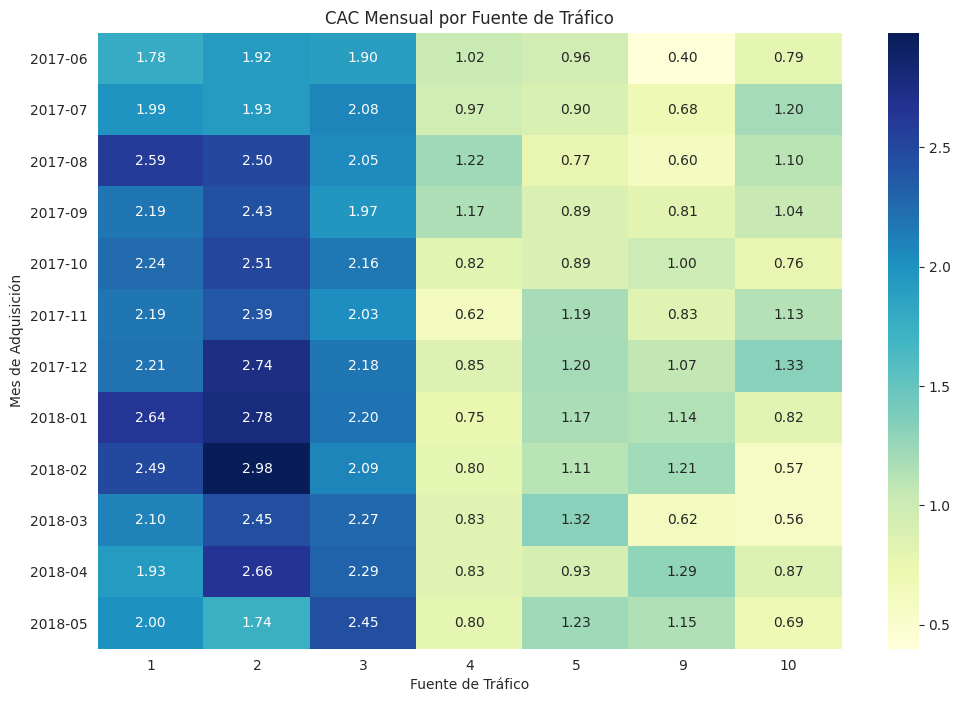

In [10]:
# Unir los datos de visitas y pedidos con la fecha de la primera visita y la fuente
first_visit_with_source = visits.sort_values('start_ts').drop_duplicates('uid')[['uid', 'source_id', 'start_ts']]
first_visit_with_source['first_visit_month'] = first_visit_with_source['start_ts'].dt.to_period('M')

# Agrupar el número de nuevos usuarios por fuente y mes de la primera visita
monthly_new_users = first_visit_with_source.groupby(['first_visit_month', 'source_id'])['uid'].nunique().to_frame('new_users').reset_index()

# Unimos con los costos mensuales
cac_data = monthly_new_users.merge(costs.groupby(['dt_month', 'source_id'])['costs'].sum().reset_index(), left_on=['first_visit_month', 'source_id'], right_on=['dt_month', 'source_id'])

# Calculamos el CAC
cac_data['cac'] = cac_data['costs'] / cac_data['new_users']

# Creamos la tabla dinámica del CAC y la visualizamos como un mapa de calor
cac_pivot = cac_data.pivot_table(index='first_visit_month', columns='source_id', values='cac')

plt.figure(figsize=(12, 8))
sns.heatmap(cac_pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('CAC Mensual por Fuente de Tráfico')
plt.xlabel('Fuente de Tráfico')
plt.ylabel('Mes de Adquisición')
plt.show()

Análisis del Gráfico de CAC.
Fuentes 1 y 2 son probablemente canales de adquisición más caros, pero podrían también ser más efectivos (aunque eso no se puede saber solo con CAC).

Fuentes 6, 9 y 10 parecen más económicas para adquirir clientes, pero habría que analizar la calidad del tráfico o la conversión.

Los meses de enero y febrero de 2018 pueden haber sido períodos de alta competencia o mayor gasto publicitario, lo que aumentó el CAC.

Cálculo y Gráfico de Gastos

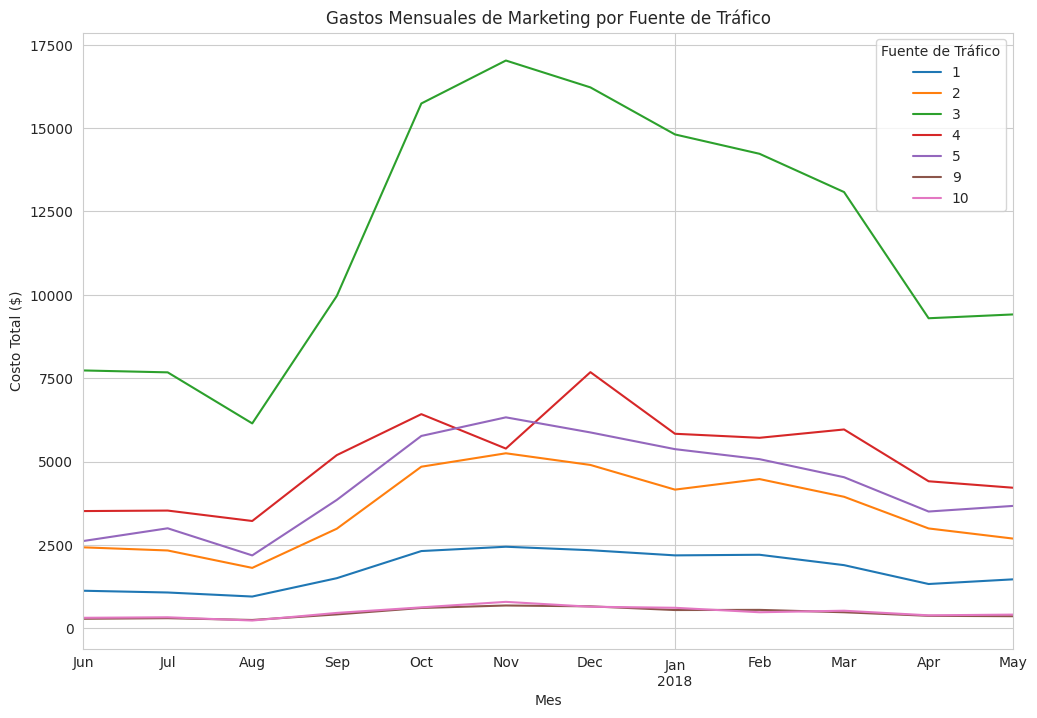

In [11]:
# Agrupamos los costos por mes y fuente
monthly_costs = costs.groupby(['dt_month', 'source_id'])['costs'].sum().reset_index()

# Creamos una tabla dinámica para la visualización
costs_pivot = monthly_costs.pivot_table(index='dt_month', columns='source_id', values='costs')

# Trazamos el gráfico de líneas de gastos
plt.figure(figsize=(12, 8))
costs_pivot.plot(ax=plt.gca())
plt.title('Gastos Mensuales de Marketing por Fuente de Tráfico')
plt.xlabel('Mes')
plt.ylabel('Costo Total ($)')
plt.legend(title='Fuente de Tráfico')
plt.grid(True)
plt.show()

ANALISIS DE Gráfico de Gastos.
La empresa invirtió fuertemente en la Fuente 3, especialmente en la segunda mitad de 2017, lo cual coincide con el aumento de CAC en esa fuente que vimos en el heatmap anterior.

A pesar de su bajo gasto, las fuentes 9 y 10 tenían un CAC bajo (como se vio en el primer gráfico), lo cual podría significar alta eficiencia.

Las fuentes con gasto medio (4 y 5) podrían representar un buen balance entre inversión y resultados, dependiendo del volumen de clientes adquiridos.

Cálculo y Gráfico del ROMI

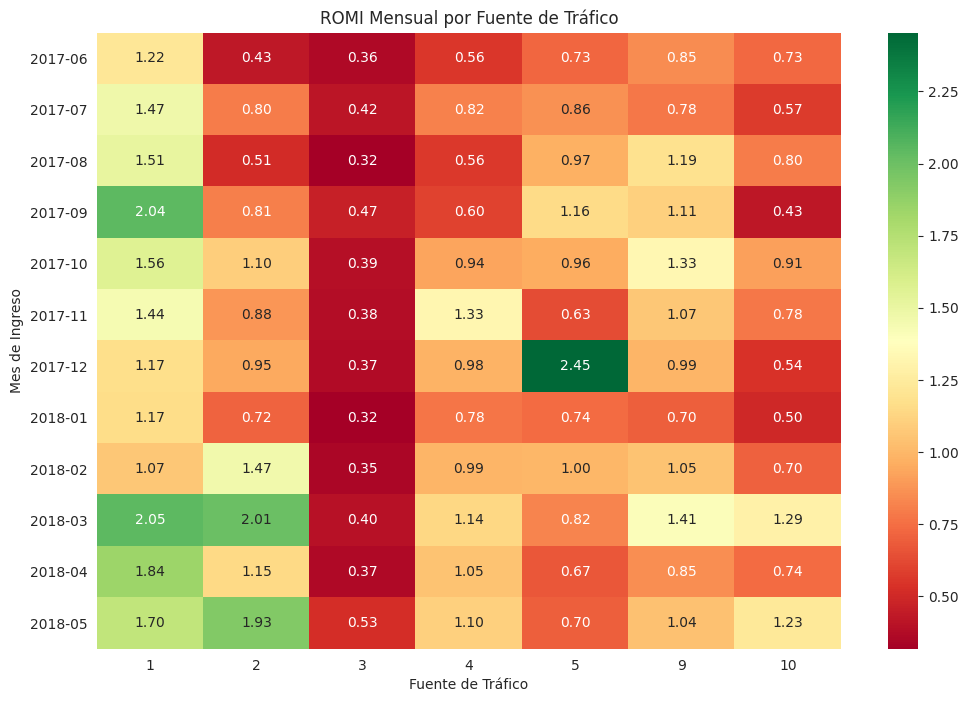

In [12]:
# Unir los datos de órdenes con las fechas de primera visita
romi_data = orders.merge(first_visit_with_source, on='uid', how='inner')
romi_data['buy_month'] = romi_data['buy_ts'].dt.to_period('M')

# Agrupar ingresos por mes y fuente
monthly_revenue = romi_data.groupby(['buy_month', 'source_id'])['revenue'].sum().reset_index()

# Unir con los costos agrupados por mes y fuente
romi_data_final = monthly_revenue.merge(costs.groupby(['dt_month', 'source_id'])['costs'].sum().reset_index(), left_on=['buy_month', 'source_id'], right_on=['dt_month', 'source_id'])

# Calculamos el ROMI
romi_data_final['romi'] = romi_data_final['revenue'] / romi_data_final['costs']

# Creamos la tabla dinámica del ROMI y la visualizamos como un mapa de calor
romi_pivot = romi_data_final.pivot_table(index='buy_month', columns='source_id', values='romi')

plt.figure(figsize=(12, 8))
sns.heatmap(romi_pivot, annot=True, fmt=".2f", cmap="RdYlGn")
plt.title('ROMI Mensual por Fuente de Tráfico')
plt.xlabel('Fuente de Tráfico')
plt.ylabel('Mes de Ingreso')
plt.show()

Análisis del Gráfico de ROMI.
Fuente 3 debería ser reevaluada: alta inversión, bajo retorno.
Fuente 6 es la más eficiente: bajo CAC, bajo gasto, y alto ROMI.
Fuente 1 también destaca como una opción de alto retorno y bajo gasto.
Fuente 2 muestra mejoría en ROMI en 2018, aunque aún necesita análisis.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

La parte de las métricas de marketing te pediría revisarlo y hacerlo separado ya que cada métrica debería ser analizada por separado y se debería mostrar gráficas para CAC, Gastos totales por fuentes, y el ROMI.

Además, si tienes resultados de un pivot_table lo mejor sería mostrarlo en una gráfica tipo mapa de calor que sólo mostrar la tabla numérica.

Por cada gráfica se debe realizar en una celda diferente y redactar ahí la interpretación de la misma.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con los cambios, ahora el proyecto es mucho más claro y quedó mejor explicado
</div>

Conclusiones generales del proyecto
1. Actividad y Comportamiento de los Usuarios

Usuarios activos: Los valores promedio de DAU (~908), WAU (~5716) y MAU (~23228) indican una base de usuarios activa y sostenida.

Sticky Factor del 24.61%: Muestra una buena retención semanal, señal de que los usuarios regresan con regularidad al servicio.

Duración de sesión (ASL): En promedio, los usuarios permanecen 643 segundos por sesión, con una distribución sesgada hacia sesiones cortas. Esto es común en plataformas transaccionales.

Tendencias temporales: Hubo un pico de usuarios entre noviembre 2017 y enero 2018, seguido de una leve caída en marzo 2018, con una recuperación en mayo. Este patrón sugiere efectos estacionales o campañas específicas.

2. Valor de Vida del Cliente (LTV) y Cohortes

Las curvas de LTV acumulado muestran que la mayor parte del valor generado por los usuarios ocurre en los primeros meses desde su adquisición, con una estabilización posterior.

Las cohortes más recientes tienden a mostrar un crecimiento más lento del LTV, lo que podría deberse a cambios en la estrategia de marketing o a la calidad del tráfico adquirido.

3. Análisis de Costos y Rentabilidad por Fuente de Tráfico
a) CAC (Costo de Adquisición por Cliente)

Fuente 3 es la más costosa para adquirir clientes y, como se verá, la menos rentable.

Fuentes 6, 9 y 10 presentan un CAC muy bajo, lo que sugiere alta eficiencia en adquisición.

Los meses de enero y febrero 2018 mostraron un aumento general en CAC, posiblemente por competencia o cambios en inversión.

b) Gastos Totales

La Fuente 3 recibió la mayor inversión, sobre todo entre octubre 2017 y marzo 2018.

Las fuentes con gasto medio (como 4 y 5) podrían representar un buen equilibrio entre inversión y retorno.

c) ROMI (Retorno de la Inversión en Marketing)

Fuente 3 debe ser reevaluada: tiene altísimo gasto y muy bajo ROMI (<0.5) durante la mayor parte del período analizado.

Fuente 6 es la más eficiente: a pesar de su bajo CAC y bajo gasto, logró un ROMI de 2.45 en diciembre 2017, el más alto de todas las fuentes.

Fuente 1 también es destacada por combinar bajo gasto y ROMI sostenido >2.0 en varios meses.

Fuente 2 mejoró su desempeño en 2018, mostrando potencial si se optimiza aún más.

4. Recomendaciones Estratégicas

🔴 Descontinuar o reevaluar inversión en Fuente 3, debido a su bajo retorno y alto costo.

Fortalecer inversión en Fuentes 1 y 6, ya que demuestran alta eficiencia y retorno.

Analizar más a fondo la evolución de Fuente 2: su mejoría en 2018 sugiere oportunidades si se optimiza correctamente.

Realizar un análisis adicional sobre la calidad del tráfico y la tasa de conversión por fuente, para enriquecer la visión del rendimiento.

5. Estado General del Negocio

Showz presenta una base de usuarios sólida y comprometida, con buenas métricas de retención.

La estrategia de marketing puede optimizarse significativamente si se enfocan los recursos en las fuentes más eficientes.

La combinación de análisis de cohortes, métricas de tráfico y rentabilidad proporciona una base sólida para la toma de decisiones informadas y el ajuste de estrategias de adquisición y retención.


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te pediría revisar la redacción de las conclusiones ya que no estás haciendo referencia a lo que se observó en el análisis sino que estás explicando lo que significa cada métrica lo cual no es lo esperado para un análisis. Se debe redactar los hallazgos más importantes de lo observado a lo largo del todo el notebook haciendo referencia a gráficas o cantidades específicas.
</div>

<div class="alert alert-block alert-success">
<b>Comentario general (2da Iteracion)</b> <a class=“tocSkip”></a>

Ahora tienes un muy buen análisis de este proyecto, te felicito!

Siempre este tipo de análisis que son un poco más complejos hay que buscar cómo explicarlos de manera sencilla considerando la audiencia a la cual se va a presentar los resultados y es ahí donde las visualizaciones juegan un papel muy importante ya que con una visualización es mucho más fácil entender la explicación que con solo valores numéricos.

Muy buen trabajo, saludos!
</div>